# Fraud Detection in Call/Data Usage
Fraud detection in telecom involves identifying unusual patterns in call or data usage that indicate unauthorized access or fraudulent activities. 

# Step 1: Define the Problem
Fraud detection is a classification or anomaly detection problem.

Goal: Identify instances of fraudulent behavior in real-time.

Challenges:
Fraudulent cases are rare, leading to class imbalance.
Dynamic patterns of fraud behavior.

# Step 2: Collect and Prepare the Data
Features typically included:
ID : Caller id
CALLING_NUM : caller number , start time, call type (domestic/international).
CALLED_NUMBER : REciever number 
START_TIME	: Call starting date and time 
END_TIME   : Call ending date and time 
CALL_TYPE : Call type (SMS or VOICE) 
CHARGE: cost for the call 
CALL_RESUL: Call answered or failed 

In [1]:
import oracledb

In [2]:
def connection():
    try :
        connection=oracledb.connect(
            user='sidney',
            password='SYSTEM',
            dsn='localhost:1521/xe'
        )
        print('Databse connection established successfully')
        return connection
    except oracledb.DatabaseError as e:
        print(f"Database connection failed: {e}")
        return None
 
connection()        
        
        

Databse connection established successfully


<oracledb.Connection to sidney@localhost:1521/xe>

In [3]:
connection=oracledb.connect(
            user='sidney',
            password='SYSTEM',
            dsn='localhost:1521/xe'
        )

In [60]:
import pandas as pd
import oracledb

# Step 1: Set up the connection
dsn = oracledb.makedsn("localhost", 1521, service_name="xe")
connection = oracledb.connect(user="sidney", password="SYSTEM", dsn=dsn)

try:
    # Step 2: Define your SQL query
    query = "SELECT    CALL_TYPE, CHARGE, CALL_RESUL, CALL_TO, IS_FRAUD, FEQ FROM telcom_frd_detection"
    
    # Step 3: Fetch the data into a DataFrame
    df = pd.read_sql(query, con=connection)
    
    # Step 4: Display the DataFrame
    print(df.head())
finally:
    # Step 5: Close the connection
    connection.close()


C:\Users\rajum\AppData\Local\Temp\ipykernel_110564\3947675354.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


  CALL_TYPE    CHARGE CALL_RESUL   CALL_TO IS_FRAUD   FEQ
0     VOICE  0.300172   ANSWERED  domestic        y  56.0
1     VOICE  0.300172   ANSWERED  domestic        y  56.0
2     VOICE  0.300172   ANSWERED  domestic        y  56.0
3     VOICE  0.300172   ANSWERED  domestic        y  56.0
4     VOICE  0.300172   ANSWERED  domestic        y  56.0


In [37]:
df.head()

,CALL_TYPE,CHARGE,CALL_RESUL,CALL_TO,IS_FRAUD,FEQ
0,VOICE,0.300172,ANSWERED,domestic,y,56.0
1,VOICE,0.300172,ANSWERED,domestic,y,56.0
2,VOICE,0.300172,ANSWERED,domestic,y,56.0
3,VOICE,0.300172,ANSWERED,domestic,y,56.0
4,VOICE,0.300172,ANSWERED,domestic,y,56.0


In [6]:
df.head()

,CALL_TYPE,CHARGE,CALL_RESUL,CALL_TO,IS_FRAUD,FEQ
0,VOICE,0.300172,ANSWERED,domestic,y,56.0
1,VOICE,0.300172,ANSWERED,domestic,y,56.0
2,VOICE,0.300172,ANSWERED,domestic,y,56.0
3,VOICE,0.300172,ANSWERED,domestic,y,56.0
4,VOICE,0.300172,ANSWERED,domestic,y,56.0


# Step 3: Data Preprocessing
(a) Handle Missing Values
Replace missing values with the median (numerical) or the mode (categorical).

(b) Encode Categorical Features
Convert non-numeric columns (e.g., call_type) using One-Hot Encoding.

(c) Scale Numeric Features
Normalize data to ensure all features have similar ranges, using StandardScaler or MinMaxScaler.

(d) Handle Class Imbalance
Use SMOTE (Synthetic Minority Oversampling Technique) or class weights to address imbalanced labels.

**(a) Handle Missing Values Replace missing values with the median (numerical) or the mode (categorical).**

In [7]:
df.head()

,CALL_TYPE,CHARGE,CALL_RESUL,CALL_TO,IS_FRAUD,FEQ
0,VOICE,0.300172,ANSWERED,domestic,y,56.0
1,VOICE,0.300172,ANSWERED,domestic,y,56.0
2,VOICE,0.300172,ANSWERED,domestic,y,56.0
3,VOICE,0.300172,ANSWERED,domestic,y,56.0
4,VOICE,0.300172,ANSWERED,domestic,y,56.0


In [8]:
#print(df.groupby(df['CALL_RESUL']).sum())
#print(df.groupby(df['IS_FRAUD']).sum())

In [9]:
df.isnull().sum()

CALL_TYPE     0
CHARGE        0
CALL_RESUL    0
CALL_TO       0
IS_FRAUD      0
FEQ           0
dtype: int64

In [10]:

df['CALL_TYPE']=df['CALL_TYPE'].fillna(df['CALL_TYPE'].mode()[0])

In [11]:
df['CHARGE']=df['CHARGE'].fillna(df['CHARGE'].median())

In [12]:
if df['CALL_TO'].dtype in ['int64', 'float64']:
    # For numeric columns
    df['CALL_TO'] = df['CALL_TO'].fillna(df['CALL_TO'].median())
else:
    # For categorical columns
    df['CALL_TO'] = df['CALL_TO'].fillna(df['CALL_TO'].mode()[0])

**OBesrvations :**

Three features are having the missing values.
1) Used the median for numeric feature to fill the missing values
   
2) Used the Mode to fil lthe Non-Numeric fetures to fill the missing values

In [61]:
df.head()
df_f=df

**(b) Encode Categorical Features**
    
Convert non-numeric columns (e.g., call_type) using One-Hot Encoding.

In [62]:
df_f.head()
 

,CALL_TYPE,CHARGE,CALL_RESUL,CALL_TO,IS_FRAUD,FEQ
0,VOICE,0.300172,ANSWERED,domestic,y,56.0
1,VOICE,0.300172,ANSWERED,domestic,y,56.0
2,VOICE,0.300172,ANSWERED,domestic,y,56.0
3,VOICE,0.300172,ANSWERED,domestic,y,56.0
4,VOICE,0.300172,ANSWERED,domestic,y,56.0


In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [73]:
df_f = pd.concat([df.drop(columns=['CALL_TYPE']), 
                pd.DataFrame(encoder.fit_transform(df[['CALL_TYPE']]), 
                             columns=encoder.get_feature_names_out(['CALL_TYPE']),
                             index=df.index)], axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:

df_f = pd.concat([df_f.drop(columns=['CALL_RESUL']), 
                pd.DataFrame(encoder.fit_transform(df_f[['CALL_RESUL']]), 
                             columns=encoder.get_feature_names_out(['CALL_RESUL']),
                             index=df_f.index)], axis=1)
df_f = pd.concat([df_f.drop(columns=['CALL_TO']), 
                pd.DataFrame(encoder.fit_transform(df_f[['CALL_TO']]), 
                             columns=encoder.get_feature_names_out(['CALL_TO']),
                             index=df_f.index)], axis=1)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
df_f.head()


,CHARGE,IS_FRAUD,FEQ,CALL_TYPE_SMS,CALL_TYPE_VOICE,CALL_RESUL_ANSWERED,CALL_RESUL_BUSY,CALL_RESUL_DECLINED,CALL_TO_domestic,CALL_TO_international
0,0.300172,y,56.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.300172,y,56.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.300172,y,56.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.300172,y,56.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.300172,y,56.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [54]:
df_encoded = pd.get_dummies(df_f)

In [58]:
df_encoded.head()

,CHARGE,FEQ,CALL_TYPE_SMS,CALL_TYPE_VOICE,CALL_RESUL_ANSWERED,CALL_RESUL_BUSY,CALL_RESUL_DECLINED,CALL_TO_domestic,CALL_TO_international,IS_FRAUD_n,IS_FRAUD_y
0,0.300172,56.0,False,True,True,False,False,True,False,False,True
1,0.300172,56.0,False,True,True,False,False,True,False,False,True
2,0.300172,56.0,False,True,True,False,False,True,False,False,True
3,0.300172,56.0,False,True,True,False,False,True,False,False,True
4,0.300172,56.0,False,True,True,False,False,True,False,False,True


In [14]:
# preprocessing on Call_type,CALL_TO , CALL_RESUL and IS_FRAUD features

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['CALL_TYPE'] = label_encoder.fit_transform(df['CALL_TYPE'])
df['CALL_RESUL'] = label_encoder.fit_transform(df['CALL_RESUL'])
df['CALL_TO'] = label_encoder.fit_transform(df['CALL_TO'])
df['IS_FRAUD'] = label_encoder.fit_transform(df['IS_FRAUD'])


In [15]:
df.head()

,CALL_TYPE,CHARGE,CALL_RESUL,CALL_TO,IS_FRAUD,FEQ
0,1,0.300172,0,0,1,56.0
1,1,0.300172,0,0,1,56.0
2,1,0.300172,0,0,1,56.0
3,1,0.300172,0,0,1,56.0
4,1,0.300172,0,0,1,56.0


In [16]:
#Finding which two feature are having the best corelation 
def correlation(dataset,threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            print(corr_matrix.columns[i] )
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
correlation(df,0.5)

CHARGE
CALL_RESUL
CALL_RESUL
CALL_TO
CALL_TO
CALL_TO
IS_FRAUD
IS_FRAUD
IS_FRAUD
IS_FRAUD
FEQ
FEQ
FEQ
FEQ
FEQ


set()

In [17]:
correlation(df,0.5)

CHARGE
CALL_RESUL
CALL_RESUL
CALL_TO
CALL_TO
CALL_TO
IS_FRAUD
IS_FRAUD
IS_FRAUD
IS_FRAUD
FEQ
FEQ
FEQ
FEQ
FEQ


set()

In [18]:
print(df.groupby(df['CALL_RESUL']).sum())
print(df.groupby(df['IS_FRAUD']).sum())

            CALL_TYPE         CHARGE  CALL_TO  IS_FRAUD         FEQ
CALL_RESUL                                                         
0              315584  246662.411235   213975      4498  16074322.0
1                   0      61.412156       50         4         0.0
2                   0     131.705250       97         7         0.0
          CALL_TYPE         CHARGE  CALL_RESUL  CALL_TO         FEQ
IS_FRAUD                                                           
0            313573  245637.998151         744   211871  15871767.0
1              2011    1217.530491          18     2251    202555.0


In [19]:
df[df['CALL_RESUL']==2]

,CALL_TYPE,CHARGE,CALL_RESUL,CALL_TO,IS_FRAUD,FEQ
12461,0,0.155661,2,1,1,0.0
12462,0,0.155661,2,1,1,0.0
12463,0,0.155661,2,1,1,0.0
12464,0,0.155661,2,1,1,0.0
12465,0,0.155661,2,1,1,0.0
...,...,...,...,...,...,...
595626,0,0.155661,2,1,0,0.0
596149,0,0.928346,2,1,0,0.0
596604,0,0.928346,2,1,0,0.0
597742,0,0.155661,2,1,0,0.0


# **Exploratory data analysis (EDA)**
**Univariate Analysis**

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt

CALL_RESUL
0    621563
2       309
1       144
Name: count, dtype: int64


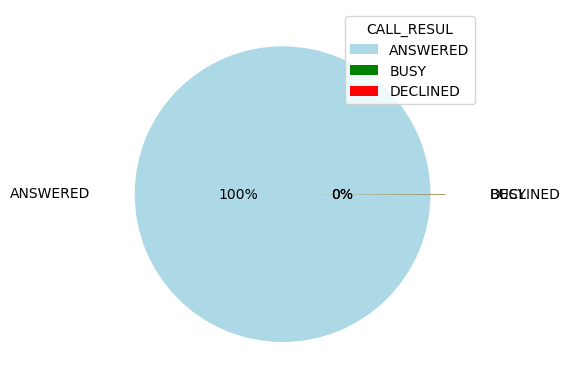

In [21]:
a = df['CALL_RESUL'].value_counts()
print(a)
labels = ['ANSWERED', 'BUSY','DECLINED']
explode = [0.1,0,0]
colors = ['#ADD8E6', 'g','r']
plt.pie(a, labels = labels, autopct = '%1.0f%%', pctdistance = 0.3,
        labeldistance = 1.3, explode = explode, colors = colors)
plt.legend(title = 'CALL_RESUL')
plt.show()

In [22]:
df.head()

,CALL_TYPE,CHARGE,CALL_RESUL,CALL_TO,IS_FRAUD,FEQ
0,1,0.300172,0,0,1,56.0
1,1,0.300172,0,0,1,56.0
2,1,0.300172,0,0,1,56.0
3,1,0.300172,0,0,1,56.0
4,1,0.300172,0,0,1,56.0


**1) Pairplot()**

1 A pairplot creates a grid of subplots where each numeric column in the dataset is paired with every other numeric column.

2 The diagonal of the grid typically shows univariate distributions (e.g., histograms or kernel density plots).

3 Off-diagonal plots show scatterplots of pairwise relationships between variables.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

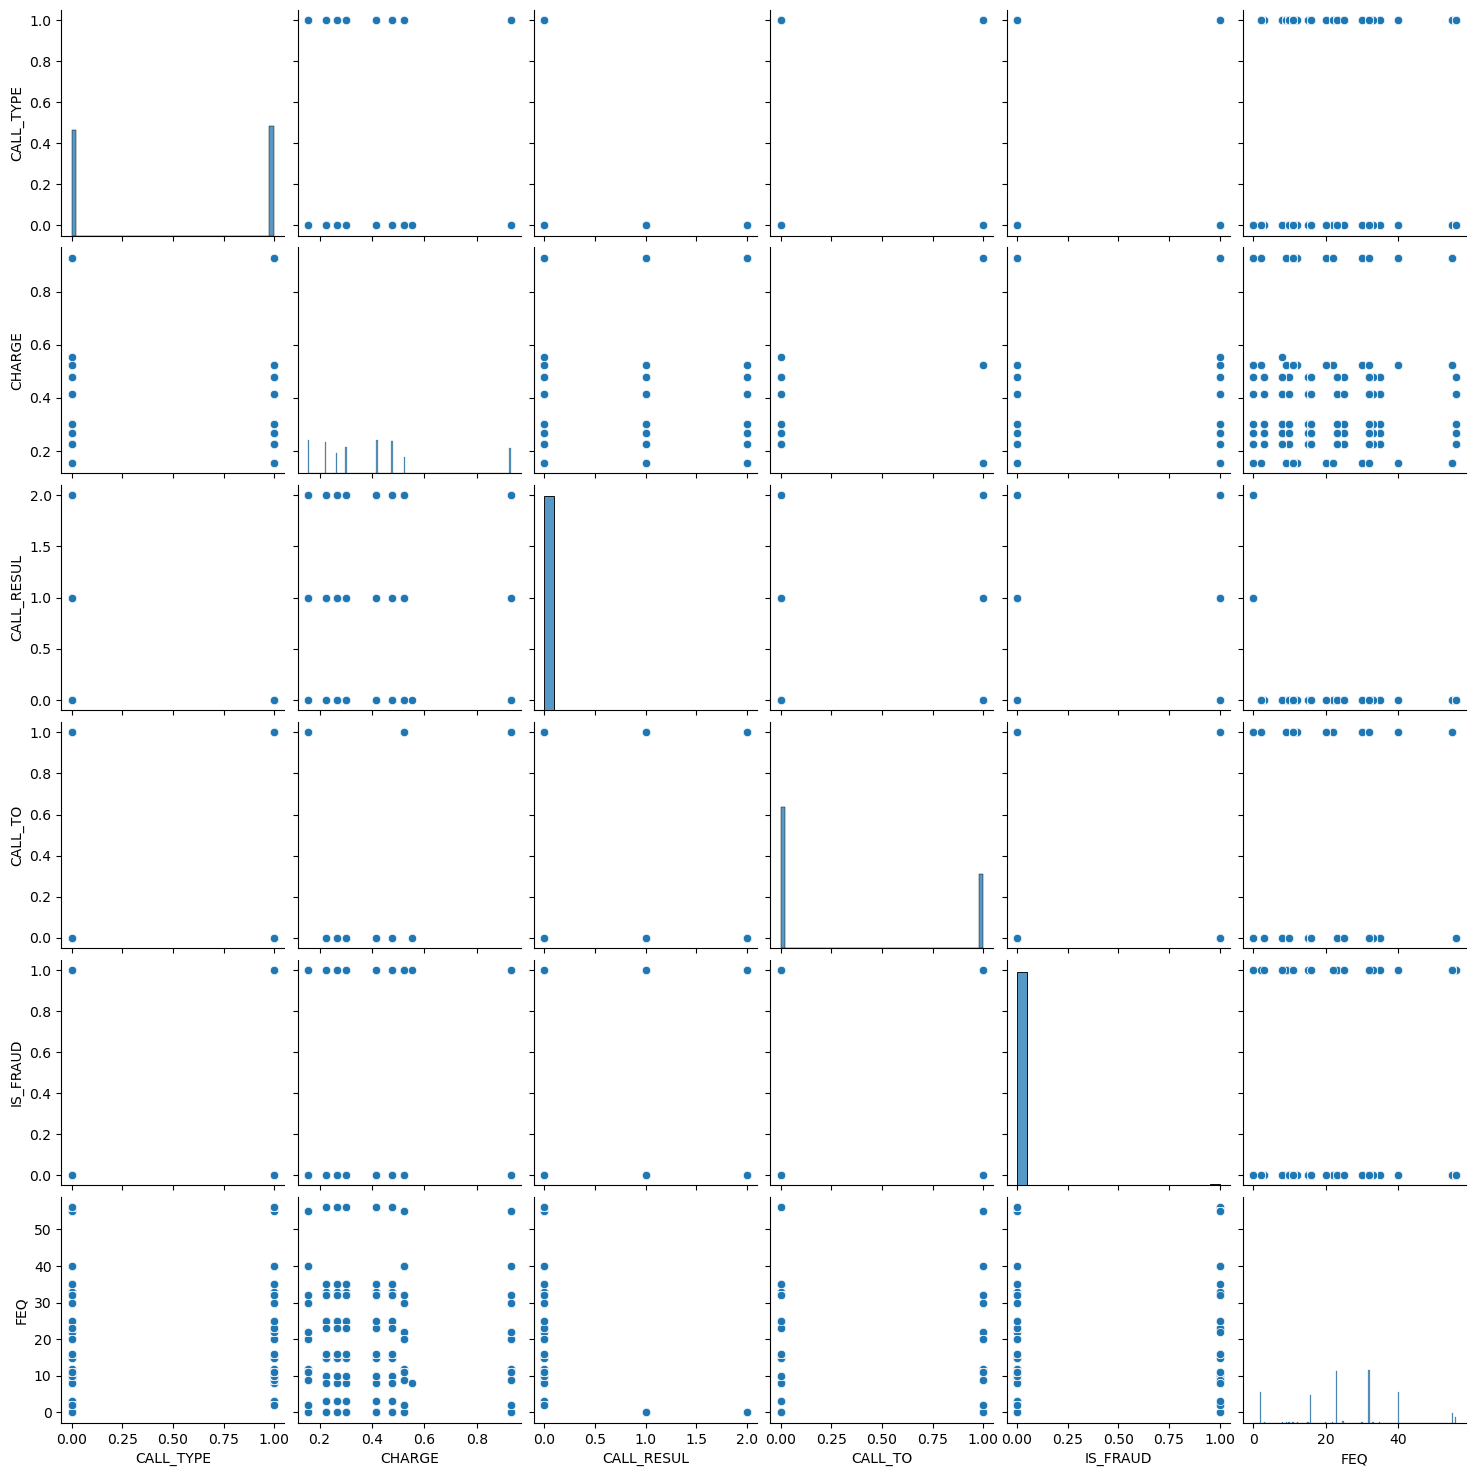

In [23]:
sns.pairplot(df)

**Interpreting the Pairplot**

**Diagonal Plots:**

    These show the distribution of individual variables.
    If the hue parameter is used, these will be colored by the hue categories.

**Off-Diagonal Plots:**

    These are scatterplots that show the relationship between two variables.
    Points are color-coded based on the hue variable, if specified.

**Color Coding (hue):**

    Use the hue parameter to differentiate data points by categories (e.g., species, class).
    This helps to see how different groups are distributed.

**Insights:**

    Look for clusters, correlations, and separations in the scatterplots.
    Analyze which variables are strongly related (indicated by clear linear or non-linear patterns).

In [24]:
# Change Plot Kind
#sns.pairplot(df,kind='reg') # Adds regression lines

In [25]:
#Adjust Diagonal Plots
#sns.pairplot(df, diag_kind='kde')  # Kernel density estimate for diagonal


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


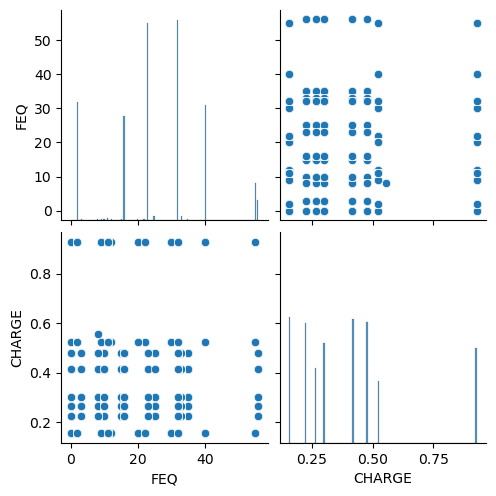

In [26]:
# Specify Columns:
sns.pairplot(df, vars=['FEQ', 'CHARGE'])


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no 

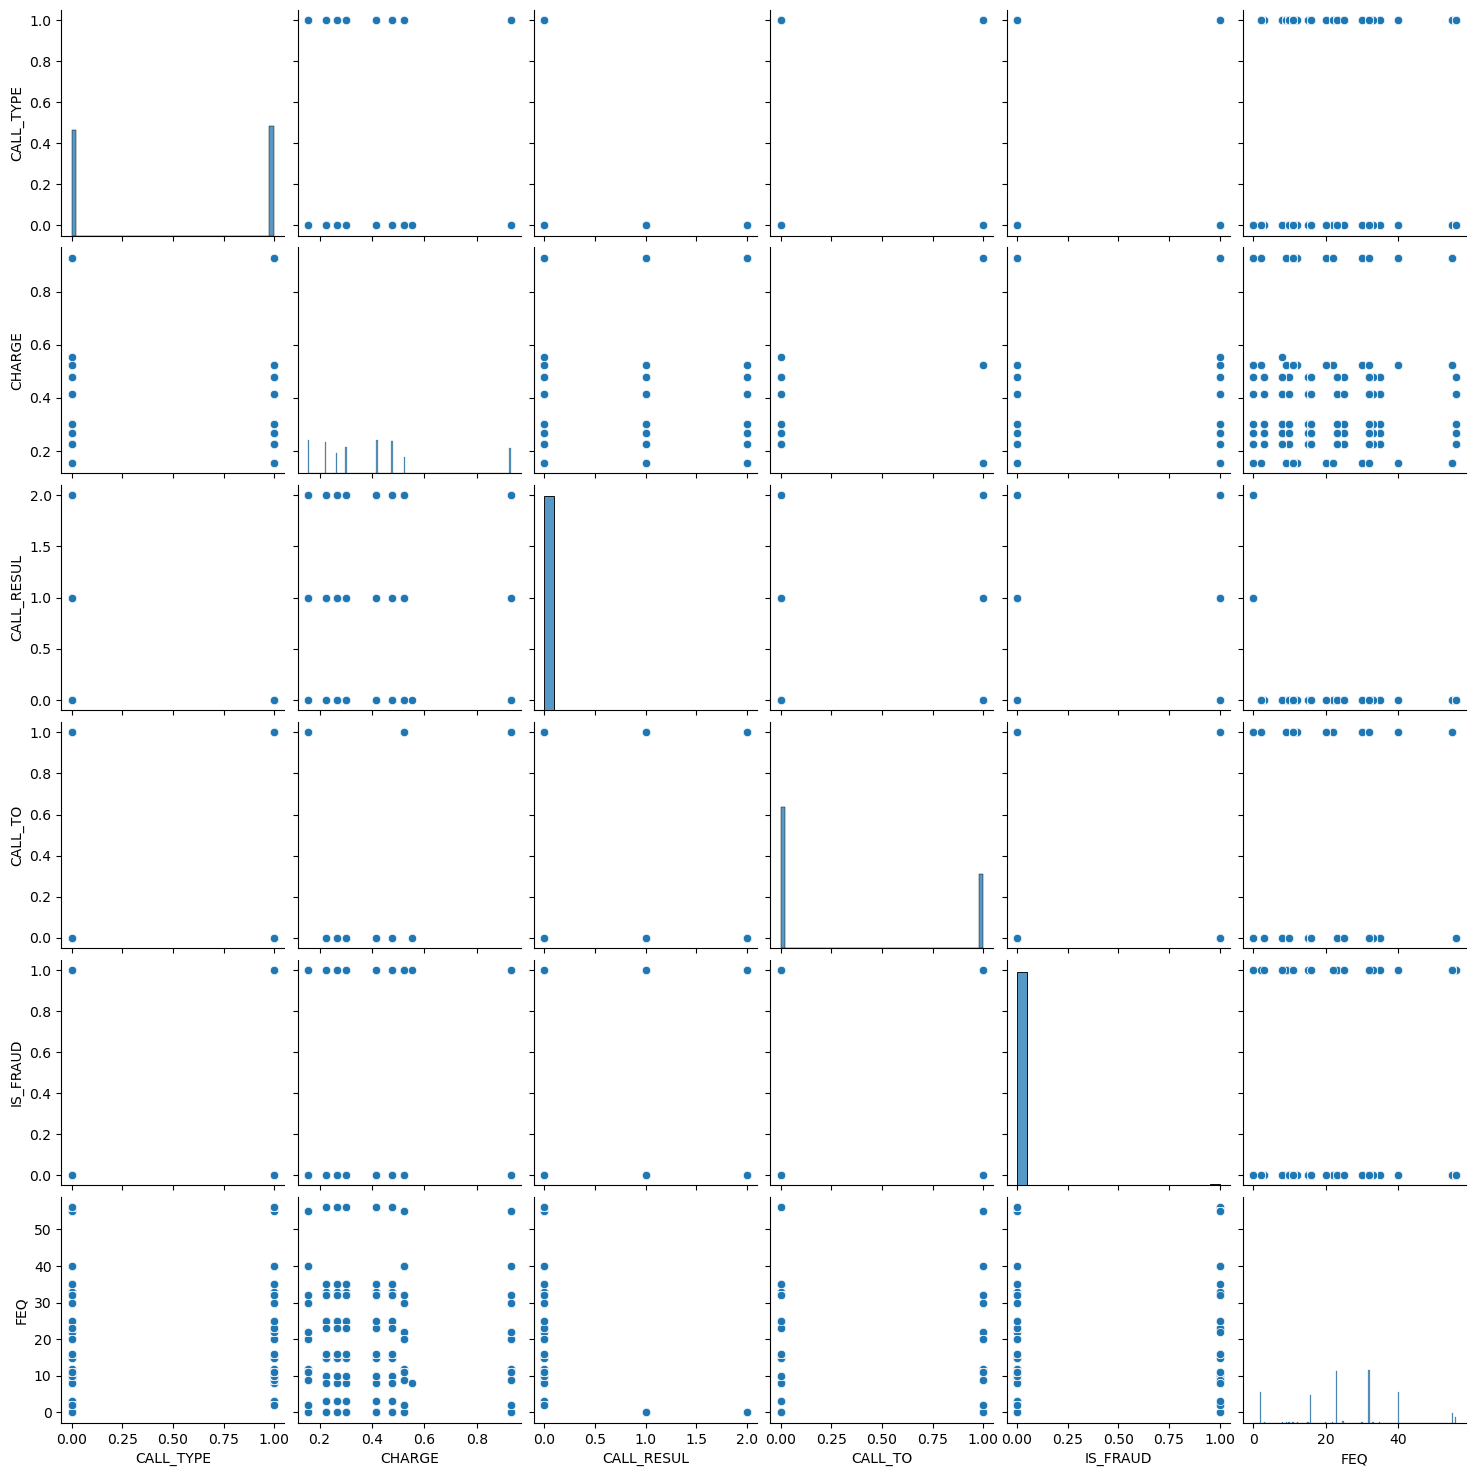

In [27]:
#Change Style:
sns.pairplot(df, palette='coolwarm', markers=['o', 's', 'D'])

 


3


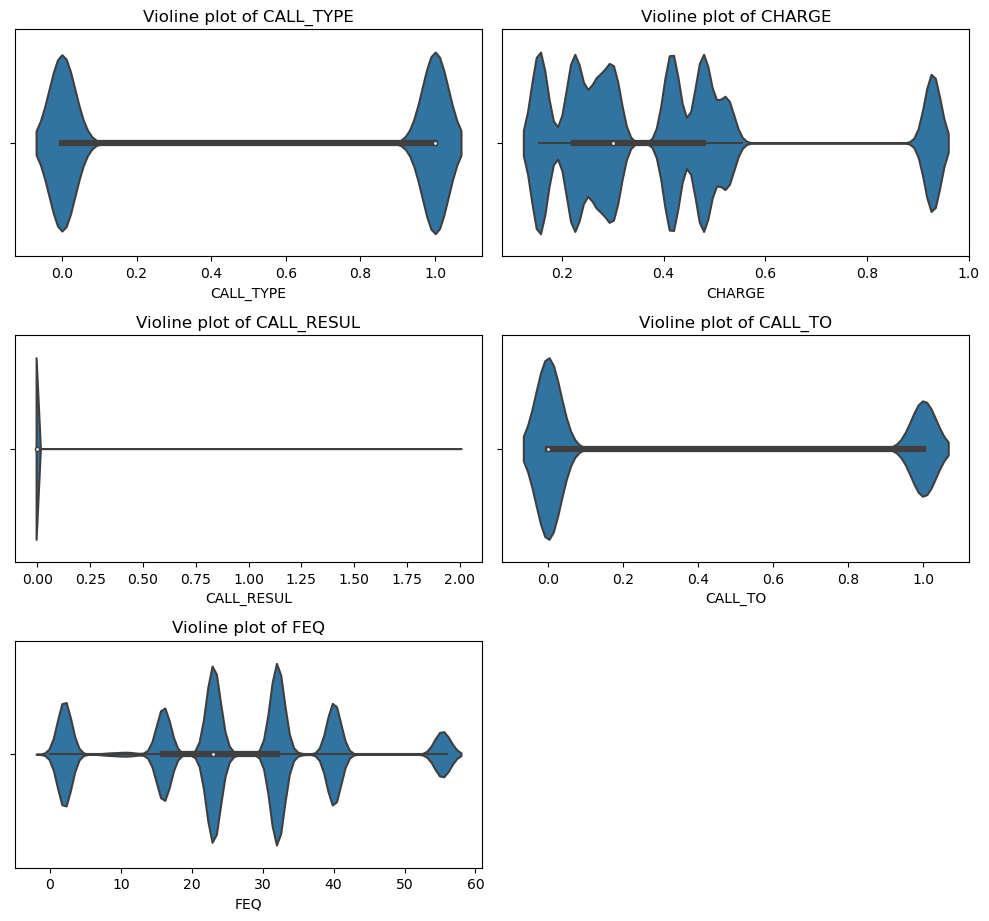

In [28]:
num_cols=len(df.columns.drop('IS_FRAUD'))
num_rows=round((num_cols+1)/2)

print(num_rows)
plt.figure(figsize=(10,5*num_rows))
for i,column in enumerate(df.columns.drop('IS_FRAUD')):
    plt.subplot(num_cols,2,i+1)
    sns.violinplot(x=df[column])
    plt.title(f"Violine plot of {column}")
plt.tight_layout()
plt.show()

6


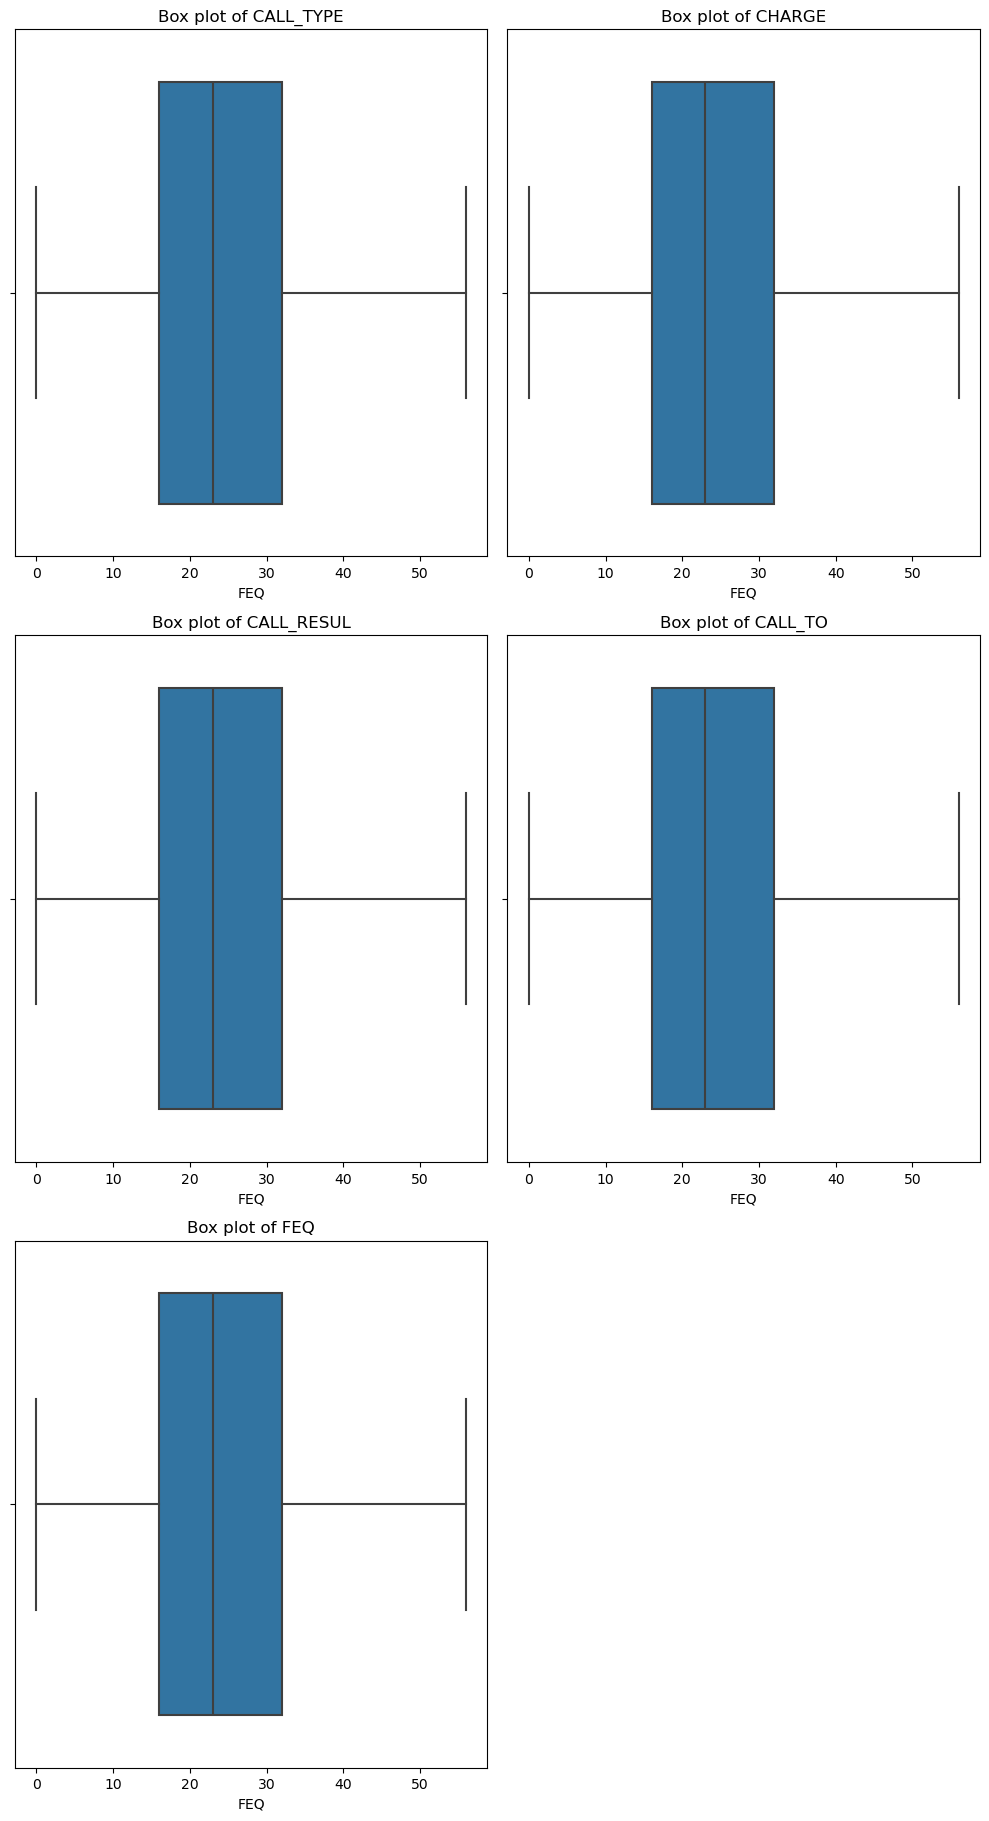

In [29]:
num_cols=len(df.columns.drop('IS_FRAUD'))
num_rows=round(num_cols+1/2)
print(num_rows)
plt.figure(figsize=(10,5*num_rows))
for i,columns in enumerate(df.columns.drop('IS_FRAUD')):
    plt.subplot(num_cols,2,i+1)
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {columns}")
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

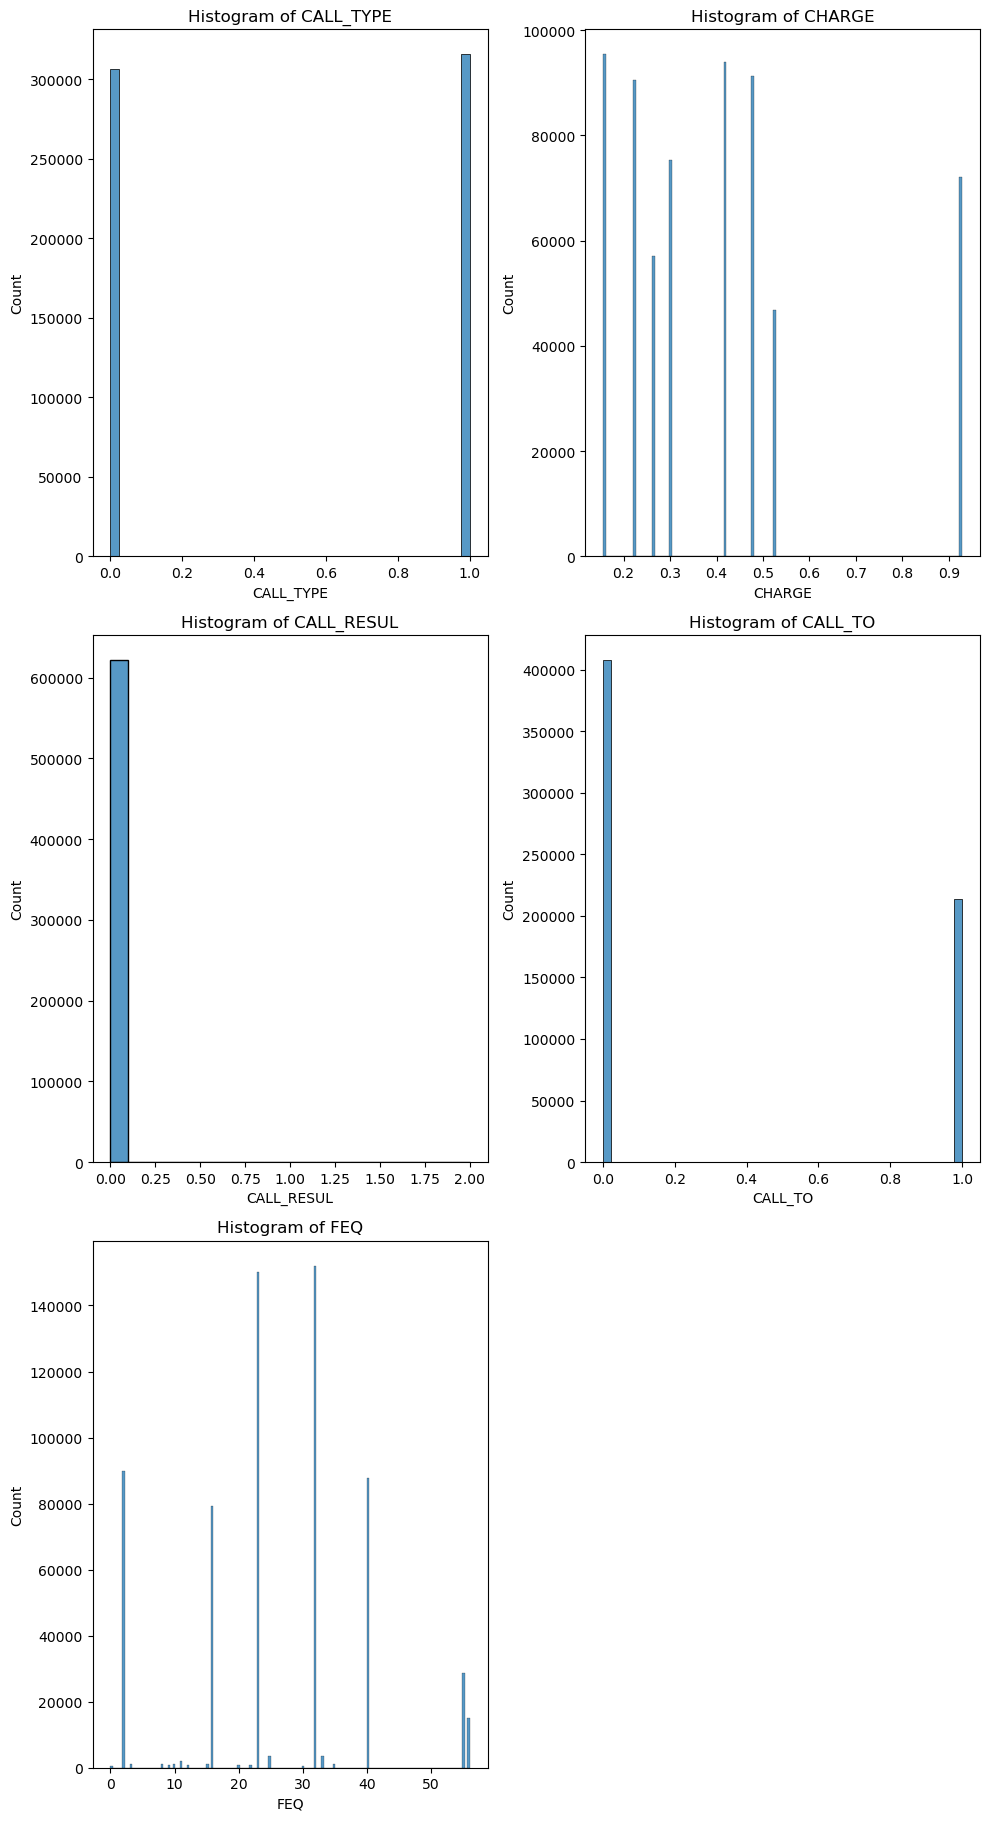

In [30]:
num_cols=len(df.columns.drop('IS_FRAUD'))
num_rows=round(num_cols+1/2)
plt.figure(figsize=(10,5*num_rows))
for i,column in enumerate(df.columns.drop('IS_FRAUD')):
    plt.subplot(num_cols,2,i+1)
    sns.histplot(x=df[column])
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()

**Bivariate Analysis**

number of columns : 5
number of rows : 3


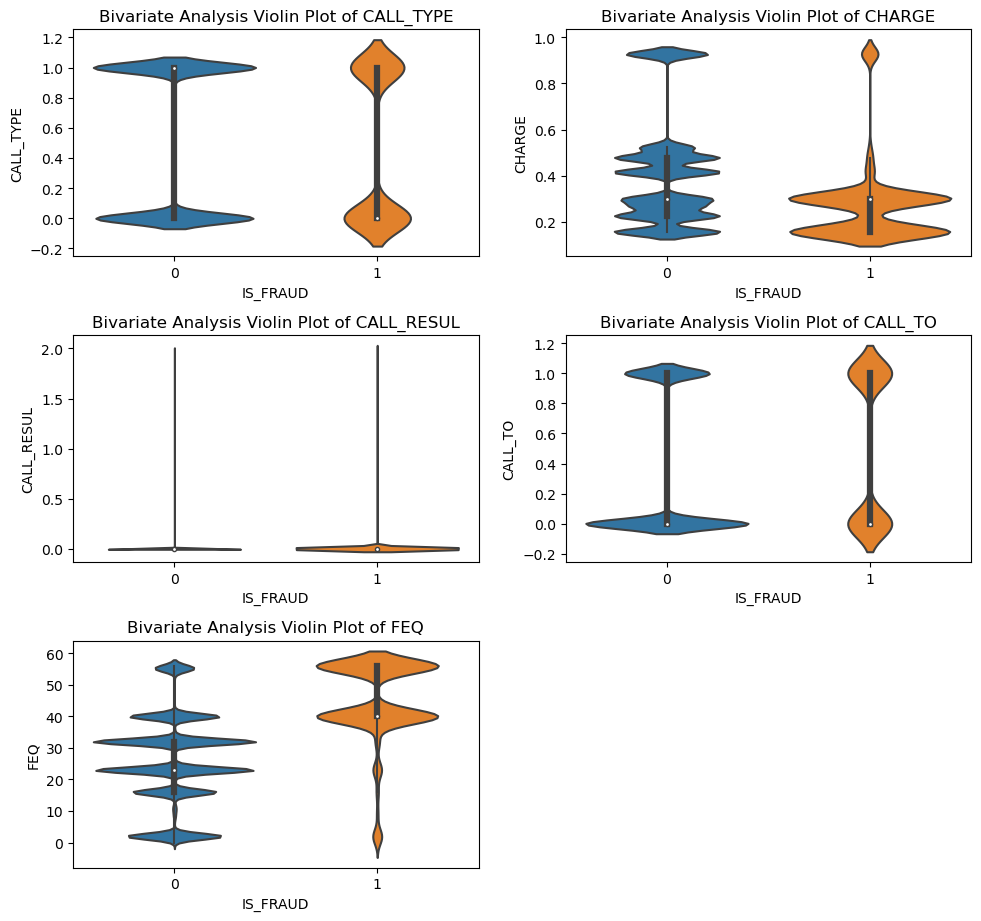

In [31]:
 
# Violin plots for each variable grouped by the Outcome

num_cols=len(df.columns.drop('IS_FRAUD'))
num_rows=int(round(num_cols+1)/2)
print(f"number of columns : {num_cols}")
print(f"number of rows : {num_rows}")
plt.figure(figsize=(10,5*num_rows))
for i,column in enumerate(df.columns.drop('IS_FRAUD')):
    plt.subplot(num_cols,2,i+1)
    sns.violinplot(data=df,x='IS_FRAUD',y=column)
    plt.title(f"Bivariate Analysis Violin Plot of {column}")
plt.tight_layout()
plt.show()

number of columns : 5
number of rows : 3


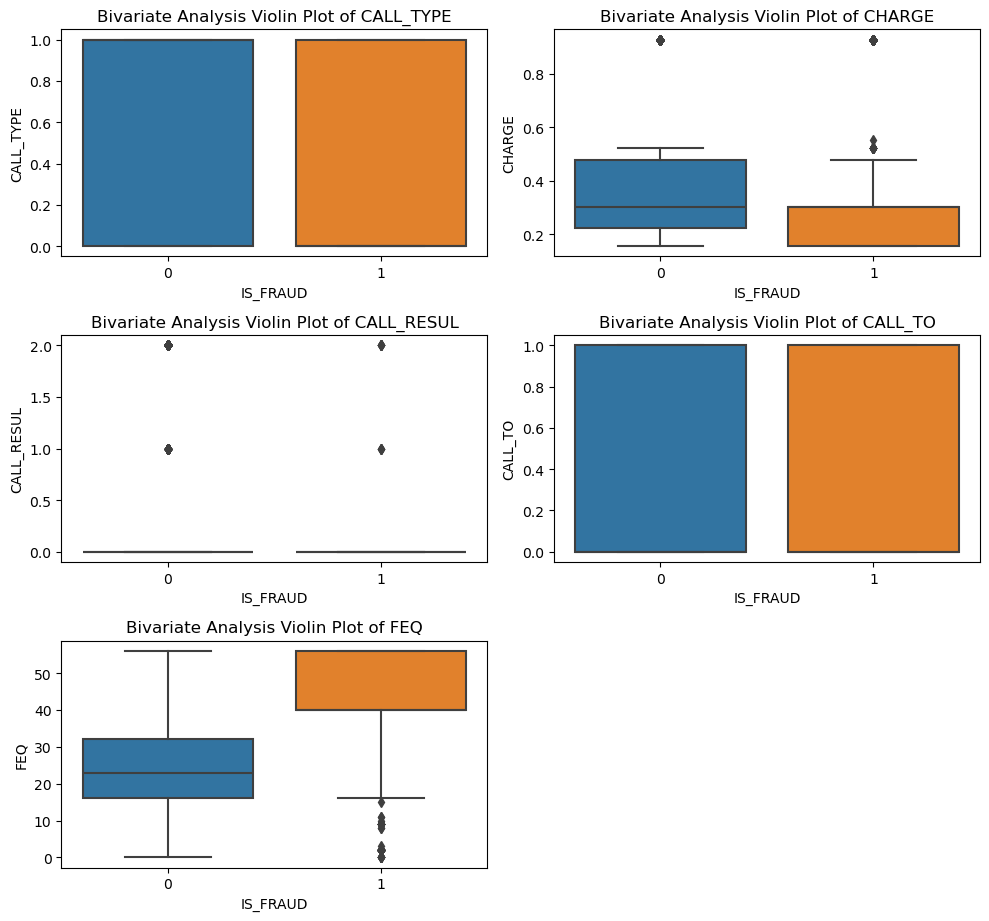

In [32]:
# Violin plots for each variable grouped by the Outcome

num_cols=len(df.columns.drop('IS_FRAUD'))
num_rows=int(round(num_cols+1)/2)
print(f"number of columns : {num_cols}")
print(f"number of rows : {num_rows}")
plt.figure(figsize=(10,5*num_rows))
for i,column in enumerate(df.columns.drop('IS_FRAUD')):
    plt.subplot(num_cols,2,i+1)
    sns.boxplot(data=df,x='IS_FRAUD',y=column)
    plt.title(f"Bivariate Analysis Violin Plot of {column}")
plt.tight_layout()
plt.show()